In [1]:
# ran in google colab
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.7 MB/s 
     |████████████████████████████████| 1.2 MB 38.4 MB/s 
     |████████████████████████████████| 189 kB 44.3 MB/s 
     |████████████████████████████████| 46 kB 2.3 MB/s 
     |████████████████████████████████| 56 kB 2.4 MB/s 
     |████████████████████████████████| 51 kB 229 kB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
from collections import defaultdict
import pandas as pd

In [3]:
import zipfile
import os
!wget --no-check-certificate \
    "https://github.com/yoheioka/15458_final_project/archive/refs/heads/main.zip" \
    -O "/tmp/15458_final_project.zip"


zip_ref = zipfile.ZipFile('/tmp/15458_final_project.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2021-12-09 22:10:41--  https://github.com/yoheioka/15458_final_project/archive/refs/heads/main.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/yoheioka/15458_final_project/zip/refs/heads/main [following]
--2021-12-09 22:10:41--  https://codeload.github.com/yoheioka/15458_final_project/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/15458_final_project.zip’

/tmp/15458_final_pr     [               <=>  ] 510.01M  13.3MB/s    in 32s     

2021-12-09 22:11:13 (16.2 MB/s) - ‘/tmp/15458_final_project.zip’ saved [534781135]



In [4]:
METRIC = 'long10'
INSTRUMENT = 'EUR_USD'
GRANULARITY = 5
IMAGE_DIR = '/tmp/15458_final_project-main/images_with_volume/%s_%s_%s/' % (
    GRANULARITY, INSTRUMENT, METRIC
)
TRAIN_DIR = IMAGE_DIR + 'train'
TEST_DIR = '/tmp/15458_final_project-main/images_with_volume/%s_%s_%s_test/' % (
    GRANULARITY, INSTRUMENT, METRIC
)

batch_size = 32
img_height = 434
img_width = 422

In [5]:
data = ImageDataLoaders.from_folder(
    IMAGE_DIR,
    valid_pct=0.3,
    size=224,
    bs=32,
    num_workers=8
)

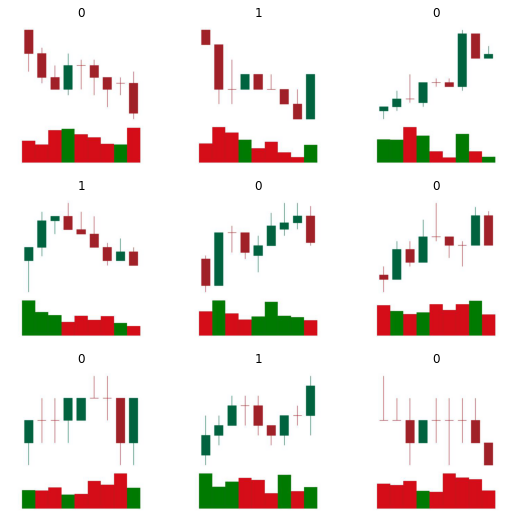

In [6]:
data.show_batch()

In [7]:
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

39304 16844


In [8]:
metrics = [
    accuracy,
    Precision(average='micro'),
    Recall(average='micro'),
]
learn = cnn_learner(data, models.resnet18, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [9]:
learn.fit_one_cycle(4)

SuggestedLRs(valley=0.0002290867705596611)

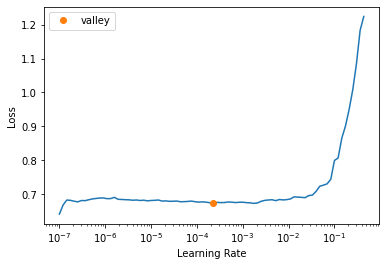

In [10]:
learn.unfreeze()
learn.lr_find()

In [11]:
learn.fit_one_cycle(4, lr_max=slice(10e-4, 10e-3))

In [12]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

dest = Path(base_dir + "15458/models/")

Mounted at /content/gdrive


In [14]:
try:
  dest.mkdir(parents=True, exist_ok=False)
except FileExistsError:
  print ('File Already Exists')
learn.save(dest/'resnet18')

File Already Exists


Path('/content/gdrive/My Drive/fastai-v3/15458/models/resnet18.pth')

In [ ]:
learn.load(dest/'resnet18')

In [15]:
test_data = get_image_files(TEST_DIR)

In [16]:
results = []  # timestamp, day, actual, prediction 
for i, test_d in enumerate(test_data):
  if (i % 1000 == 0):
    print(i)
  splits = str(test_d).split('/')
  time = int(splits[-1].replace('.jpg', ''))
  day = int(time / 86400) * 86400
  actual = int(splits[-2])
  prediction = int(learn.predict(test_d)[0])
  results.append([time, day, actual, prediction])

0


1000


2000


3000


4000


5000


6000


7000


8000


9000


10000


11000


12000


13000


14000


15000


16000


17000


18000
